Norma del punto: 3.0
Nuevo punto tras desplazamiento: [1 4]
Nuevo punto tras escalado: [2 8]
Producto interno con (1, 1): 10
Nuevo punto tras rotación: [-4.24264069  7.07106781]


/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


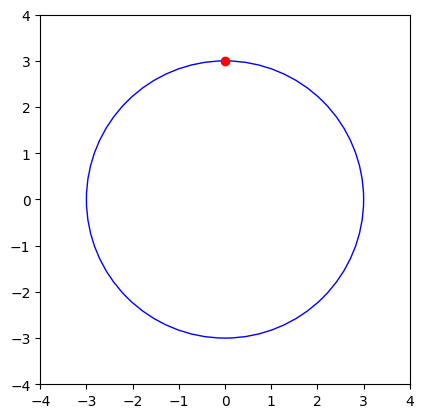

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

class Escena:
    def __init__(self, centro_circulo, radio_circulo, color_circulo, punto_x, punto_y):
        self.centro_circulo = np.array(centro_circulo)
        self.radio_circulo = radio_circulo
        self.color_circulo = color_circulo
        self.punto = np.array([punto_x, punto_y])

        # Crear la figura y los ejes
        self.fig, self.ax = plt.subplots()
        self.circulo = plt.Circle(self.centro_circulo, self.radio_circulo, color=self.color_circulo, fill=False)
        self.ax.add_patch(self.circulo)
        self.punto_plot, = self.ax.plot([], [], 'ro')  # Punto rojo

        # Establecer los límites de los ejes
        self.ax.set_xlim([self.centro_circulo[0] - self.radio_circulo - 1, self.centro_circulo[0] + self.radio_circulo + 1])
        self.ax.set_ylim([self.centro_circulo[1] - self.radio_circulo - 1, self.centro_circulo[1] + self.radio_circulo + 1])
        self.ax.set_aspect('equal')

        # Dibujar la escena inicialmente
        self.dibujar_escena()

    def dibujar_escena(self):
        """ Dibuja el punto en su posición actual. """
        self.punto_plot.set_data([self.punto[0]], [self.punto[1]])  

    def desplazar(self, vector):
        """ Desplaza el punto por un vector dado. """
        self.punto += np.array(vector)

    def escalar(self, factor):
        """ Escala la posición del punto respecto al origen. """
        self.punto *= factor

    def norma(self):
        """ Retorna la norma del vector posición del punto. """
        return np.linalg.norm(self.punto)

    def producto_interno(self, otro_vector):
        """ Calcula el producto interno con otro vector. """
        return np.dot(self.punto, np.array(otro_vector))

    def rotar(self, angulo):
        """ Rota el punto alrededor del origen en un ángulo dado (grados). """
        angulo_rad = np.radians(angulo)
        matriz_rotacion = np.array([[np.cos(angulo_rad), -np.sin(angulo_rad)],
                                    [np.sin(angulo_rad), np.cos(angulo_rad)]])
        self.punto = matriz_rotacion @ self.punto  # Producto matricial

    def actualizar(self, frame):
        """ Simula el movimiento del punto en una órbita circular. """
        angulo = np.radians(frame)  # Convertir el frame en un ángulo
        self.punto[0] = self.centro_circulo[0] + self.radio_circulo * np.cos(angulo)
        self.punto[1] = self.centro_circulo[1] + self.radio_circulo * np.sin(angulo)
        self.dibujar_escena()
        return self.punto_plot,

    def simular(self):

        ani = FuncAnimation(self.fig, self.actualizar, frames=np.arange(0, 360, 5), interval=50)
        plt.show()

#  Ejemplo de uso:
centro = (0, 0)
radio = 3
color = 'blue'
punto_x = 0
punto_y = 3  # Inicializa el punto en el borde del círculo

mi_escena = Escena(centro, radio, color, punto_x, punto_y)

#  Prueba de funciones antes de la simulación
print("Norma del punto:", mi_escena.norma())
mi_escena.desplazar([1, 1])
print("Nuevo punto tras desplazamiento:", mi_escena.punto)
mi_escena.escalar(2)
print("Nuevo punto tras escalado:", mi_escena.punto)
print("Producto interno con (1, 1):", mi_escena.producto_interno([1, 1]))
mi_escena.rotar(45)
print("Nuevo punto tras rotación:", mi_escena.punto)

mi_escena.simular()

